Dataset Loaded Successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Missing Values in Each Column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                    

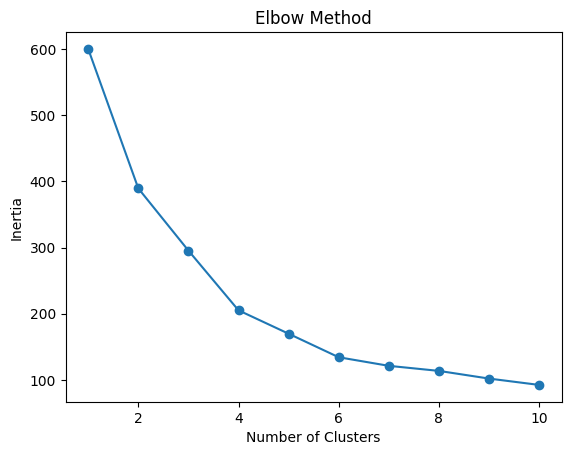

Clustered dataset saved successfully as 'C:\Users\chroh\OneDrive\Desktop\Clustered_Customers.csv'


In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define file paths
input_file = r'C:\Users\chroh\OneDrive\Desktop\Mall_Customers.csv.csv'  # Input file path
output_file = r'C:\Users\chroh\OneDrive\Desktop\Clustered_Customers.csv'  # Output file path

# Load the dataset
df = pd.read_csv(input_file)
print("Dataset Loaded Successfully!")
print(df.head())

# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Overview of the dataset
print("Dataset Information:")
df.info()

# Drop CustomerID column as it's not useful for clustering
df = df.drop(columns=['CustomerID'])

# Encode Gender column
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Use the Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method (if needed)
import matplotlib.pyplot as plt
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with the optimal number of clusters (e.g., k=5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Save the clustered dataset for Tableau
df.to_csv(output_file, index=False)
print(f"Clustered dataset saved successfully as '{output_file}'")
